In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = mnist_prep()

In [6]:
layers = 5
neurons = [128, 128, 64, 32, 10]
n_cols = X_train.shape[1]
batch_size = 1000
epochs = 10
optimizer = "adam"

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.7539 - accuracy: 0.7834 - val_loss: 0.2482 - val_accuracy: 0.9304
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 0.1815 - accuracy: 0.9468 - val_loss: 0.1630 - val_accuracy: 0.9540
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.1171 - accuracy: 0.9638 - val_loss: 0.1486 - val_accuracy: 0.9604
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0852 - accuracy: 0.9742 - val_loss: 0.1308 - val_accuracy: 0.9655
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.1225 - val_accuracy: 0.9683
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0486 - accuracy: 0.9860 - val_loss: 0.1247 - val_accuracy: 0.9691
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.1195 - val_accuracy: 0.9716
Epoch 8/10
60/60 [=

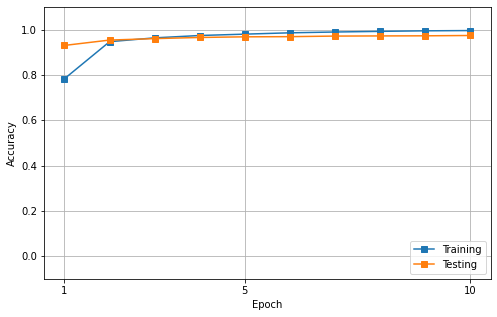

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = optimizer)
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train,
                     y_train = y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model,
            mean_comparison = None,
            start_epoch = 1,
            savefig = False,
            file = "../img/mnist/mnist_{}_E{}_B{}.png".format(optimizer, epochs, batch_size))
#nn_save(model,
#        "../models/mnist/mnist_{}_E{}_B{}.h5".format(optimizer, epochs, batch_size))

In [8]:
model_1 = nn_load("../models/mnist/mnist_sgd_E10_B1000.h5")

In [9]:
enkf_model = nn_load("../models/mnist/enkf_mnist_full_E10_B1000_P500_H2.h5")

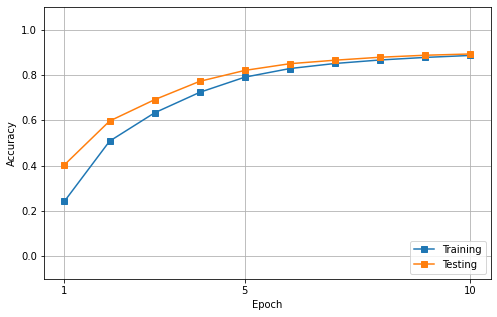

In [10]:
nn_plot_acc(model_1,
            mean_comparison = None, 
            start_epoch = 1,
            title = "",
            savefig = False,
            file = "../img/accuracy_per_epoch.png"
            ) 

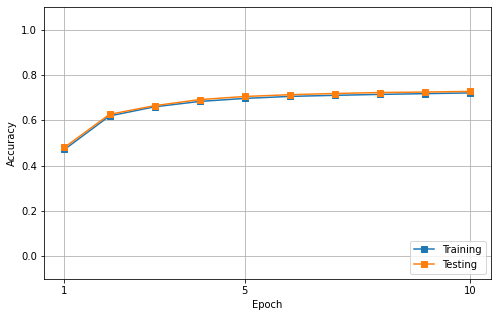

In [11]:
nn_plot_acc(enkf_model,
            mean_comparison = None,
            start_epoch = 1,
            title = "",
            savefig = False,
            file = "../img/accuracy_per_epoch.png"
            ) 

In [12]:
model_list = [model,
              model_1,
              enkf_model]
label_list = ["Adam",
              "SGD",
              "EnKF"]

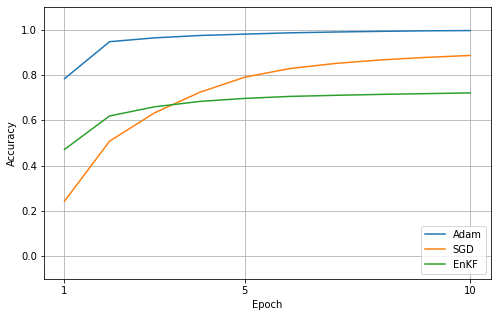

In [13]:
nn_plot_acc_many(model_list,
                 label_list,
                 train_test = "train",
                 mean_comparison = None,
                 start_epoch = 1,
                 savefig = False,
                 file = "../img/mnist/mnist_{}_E{}_B{}.png".format(optimizer, epochs, batch_size))